In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt
import warnings
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

In [3]:
X, y = make_circles(n_samples=100, noise=0.1, random_state=1)

<Axes: >

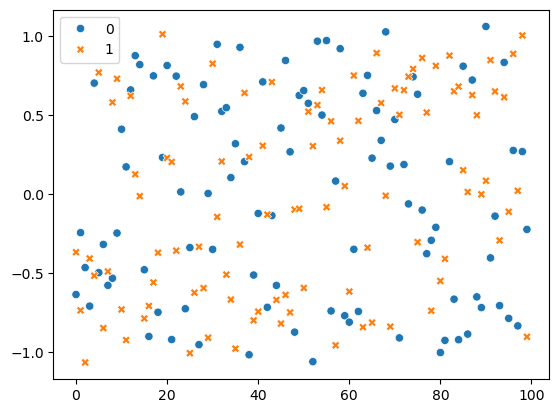

In [5]:
sns.scatterplot(X)

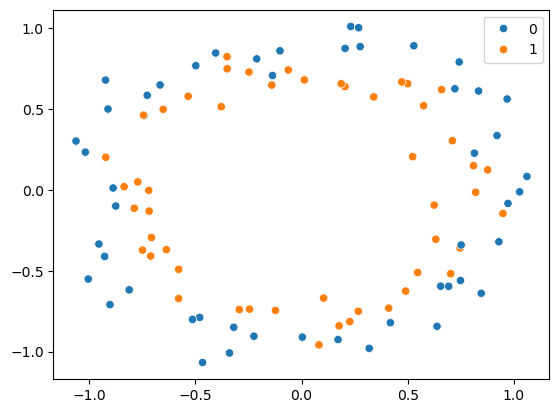

In [7]:
sns.scatterplot(x=X[:, 0], y=X[:, 1], hue=y)
plt.show()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [15]:
model = Sequential()

model.add(Dense(256, input_dim=2, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

C:\Users\parvez\anaconda3\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [17]:
model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])

In [ ]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras.callbacks import Callback

def train_with_live_plot(X, y, model, test_size=0.2, epochs=100, batch_size=32):
    # Split dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    plt.ion()  # interactive mode on
    fig, ax = plt.subplots()
    ax.set_title("Live Training Loss")
    ax.set_xlabel("Epoch")
    ax.set_ylabel("Loss")
    train_line, = ax.plot([], [], label="Train Loss")
    val_line, = ax.plot([], [], label="Validation Loss")
    ax.legend()

    train_losses = []
    val_losses = []

    class LivePlotCallback(Callback):
        def on_epoch_end(self, epoch, logs=None):
            train_losses.append(logs.get("loss"))
            val_losses.append(logs.get("val_loss"))

            # Update data for plot lines
            train_line.set_data(range(len(train_losses)), train_losses)
            val_line.set_data(range(len(val_losses)), val_losses)

            # Rescale axes to fit new data
            ax.relim()
            ax.autoscale_view()

            # Draw updated plot
            fig.canvas.draw()
            fig.canvas.flush_events()

            plt.pause(0.01)  # small pause to update the plot

    # Train model with callback
    model.fit(
        X_train, y_train,
        validation_data=(X_test, y_test),
        epochs=epochs,
        batch_size=batch_size,
        verbose=0,
        callbacks=[LivePlotCallback()]
    )

    plt.ioff()  # turn off interactive mode
    plt.show()


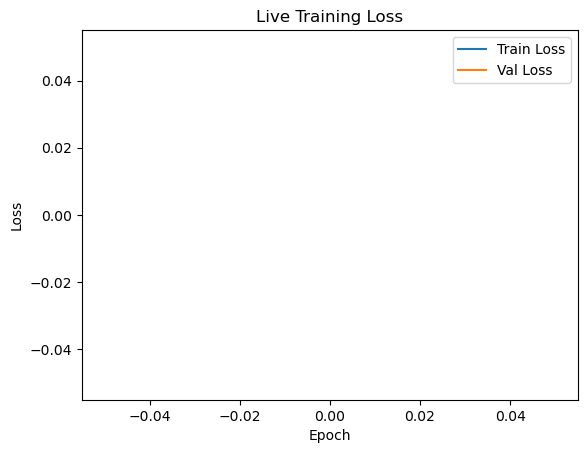

In [28]:
train_with_live_plot(X, y, model, epochs=100)